**Section I: Import the data**

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

In [2]:
!pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-07/1.1-lesson/code/starter-code


In [3]:
mtcars = pd.read_csv("../../assets/datasets/mtcars.csv")

**Section II: Format the Data**

Convert to a Pandas Dataframe for our analysis

In [4]:
mtcars.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Loop through Cars List and Convert to Numeric. **HINT:** Reference the lesson for help with this!

In [5]:
mtcars.Car.unique()

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'], dtype=object)

In [6]:
mtcars['carNum'] = mtcars['Car'].map({'Mazda RX4': 1, 'Mazda RX4 Wag': 2, 'Datsun 710': 3, 'Hornet 4 Drive': 4,
       'Hornet Sportabout': 5, 'Valiant': 6, 'Duster 360': 7, 'Merc 240D': 8,
       'Merc 230': 9, 'Merc 280': 10, 'Merc 280C': 11, 'Merc 450SE': 12, 'Merc 450SL': 13,
       'Merc 450SLC': 14, 'Cadillac Fleetwood': 15, 'Lincoln Continental': 16,
       'Chrysler Imperial': 17, 'Fiat 128': 18, 'Honda Civic': 19, 'Toyota Corolla': 20,
       'Toyota Corona': 21, 'Dodge Challenger': 22, 'AMC Javelin': 23, 'Camaro Z28': 24,
       'Pontiac Firebird': 25, 'Fiat X1-9': 26, 'Porsche 914-2': 27, 'Lotus Europa': 28,
       'Ford Pantera L': 29, 'Ferrari Dino': 30, 'Maserati Bora': 31, 'Volvo 142E': 32} )

In [7]:
del mtcars['Car']
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,carNum
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,4
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,5


Plot the Data. **HINT** Be sure to examine the different variables and how the relate to each other

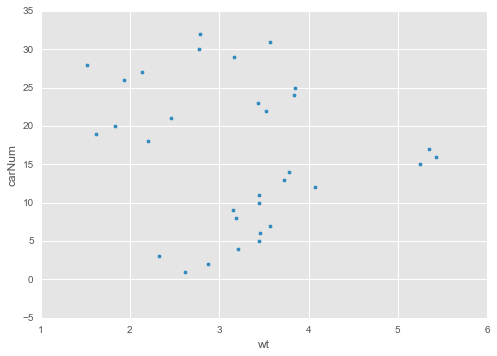

In [8]:
mtcars.plot(kind='scatter', x='wt', y='carNum')

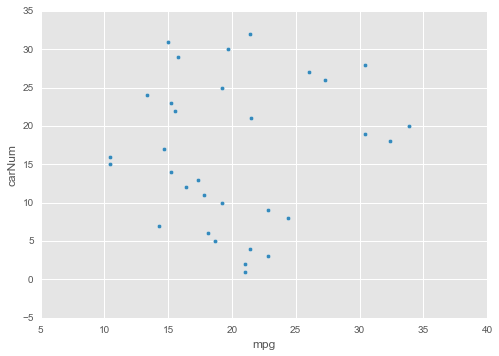

In [9]:
mtcars.plot(kind='scatter', x='mpg', y='carNum')

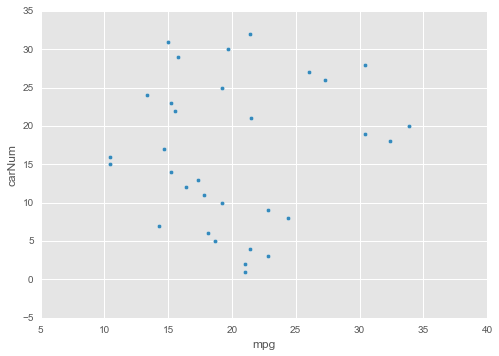

In [10]:
mtcars.plot(kind='scatter', x='mpg', y='carNum')
## Try this for multiple variable combinations

Convert to Matrix

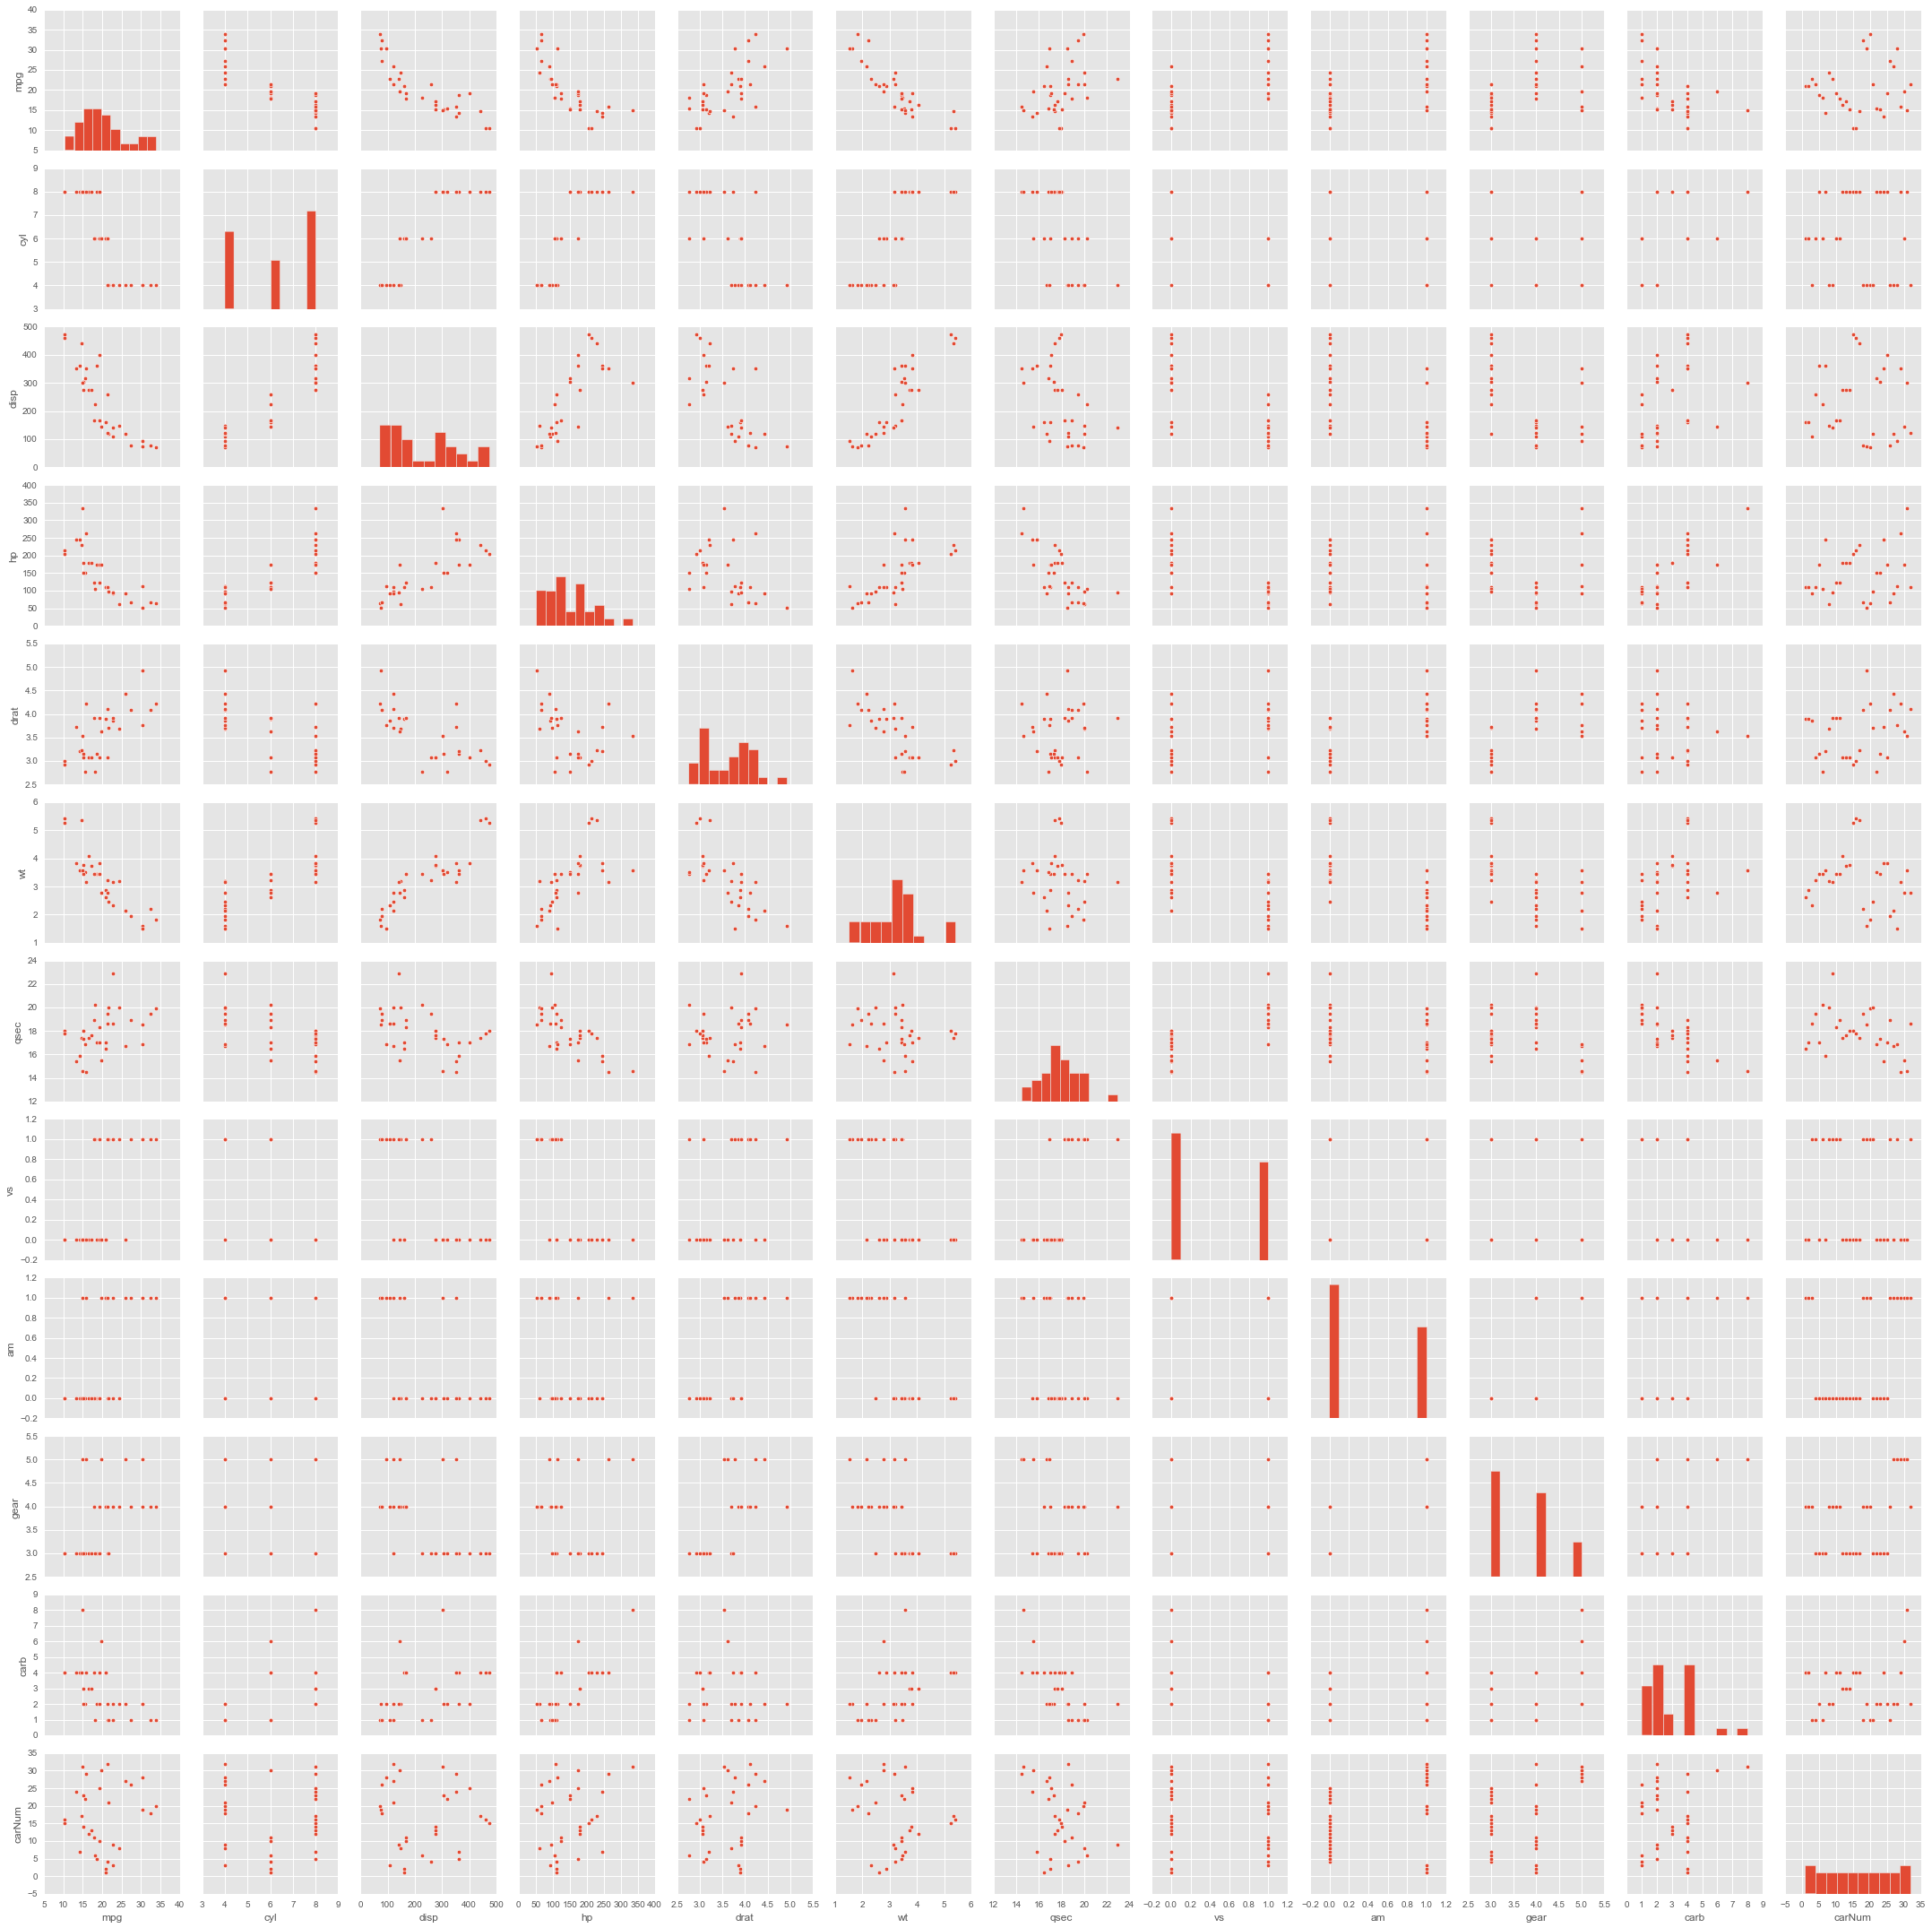

In [11]:
sns.pairplot(mtcars)

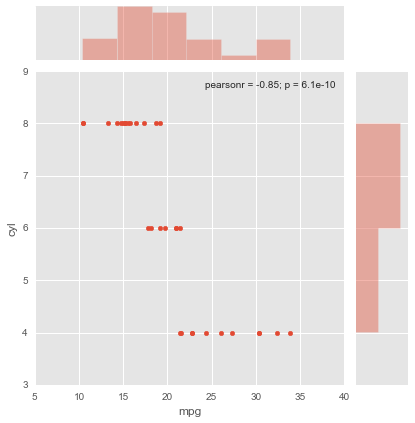

In [12]:
sns.jointplot('mpg','cyl', data=mtcars)

In [13]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,carNum
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,0.084699
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.028882
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.022048
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.242295
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,0.240952
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,-0.162419
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,-0.366995
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,-0.109162
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,0.354905
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,0.400825


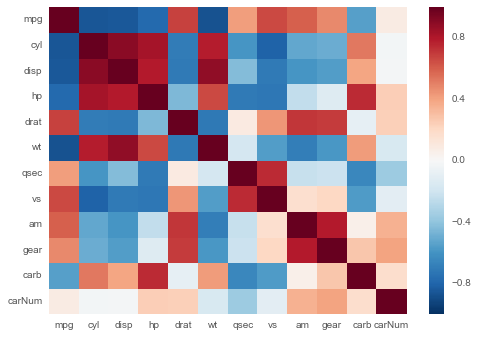

In [14]:
sns.heatmap(mtcars.corr())

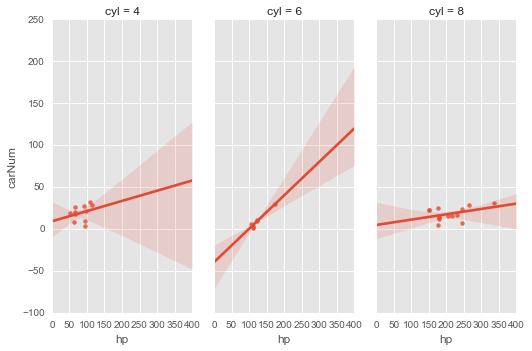

In [15]:
a = sns.lmplot(x="hp", y="carNum", col="cyl", data=mtcars,
           aspect=.5)

In [16]:
carsMat = mtcars.as_matrix(['mpg','cyl'])#specify which variables you want to use based on your EDA above

**Section III: Cluster the data**

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

In [17]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(carsMat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [18]:
labels = kmeans.labels_ #These are my cluster labels
centroids = kmeans.cluster_centers_ #These are the centers of my clusters

In [19]:
labels

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 1, 2], dtype=int32)

In [20]:
centroids

array([[ 30.06666667,   4.        ],
       [ 14.45833333,   8.        ],
       [ 20.64285714,   5.57142857]])

Find the Silhoutte Score and plot

In [21]:
metrics.silhouette_score(carsMat, labels, metric='euclidean')

0.55803816263943262

Since our silhouette score is positive and not negative, we know that our data points were not placed in the wrong clusters, so that's good. Also, the further our number is away from zero, the greater the distance between clusters, meaning a more solid differentiation between two the two groups that exist within our data.

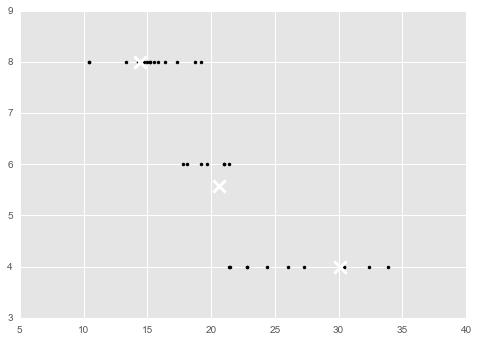

In [23]:
plt.plot(carsMat[:, 0], carsMat[:, 1], 'k.', markersize=7)
# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=150, linewidths=3,
            color='w', zorder=10)

0.561133050878


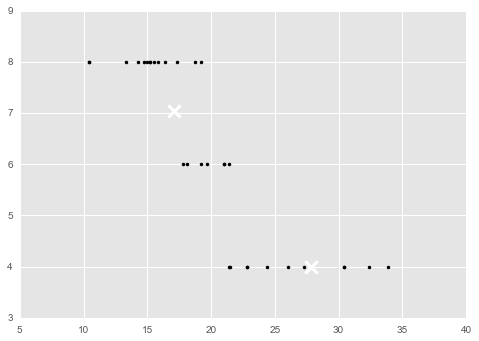

In [24]:
k2 = 2
kmeans2 = cluster.KMeans(n_clusters=k2)
kmeans2.fit(carsMat)

labels2 = kmeans2.labels_ #These are my cluster labels
centroids2 = kmeans2.cluster_centers_ #These are the centers of my clusters

plt.plot(carsMat[:, 0], carsMat[:, 1], 'k.', markersize=7)
# Plot the centroids as a white X
plt.scatter(centroids2[:, 0], centroids2[:, 1],
            marker='x', s=150, linewidths=3,
            color='w', zorder=10)

print metrics.silhouette_score(carsMat, labels2, metric='euclidean')

0.52017858232


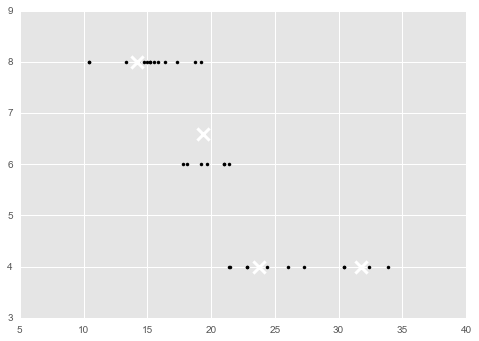

In [25]:
k2 = 4
kmeans4 = cluster.KMeans(n_clusters=k2)
kmeans4.fit(carsMat)

labels4 = kmeans4.labels_ #These are my cluster labels
centroids4 = kmeans4.cluster_centers_ #These are the centers of my clusters

plt.plot(carsMat[:, 0], carsMat[:, 1], 'k.', markersize=7)
# Plot the centroids as a white X
plt.scatter(centroids4[:, 0], centroids4[:, 1],
            marker='x', s=150, linewidths=3,
            color='w', zorder=10)

print metrics.silhouette_score(carsMat, labels4, metric='euclidean')